## Customer Lifetime Value
### Created By : Christian
### Dataset : [Customer Lifetime Value Dataset](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ) 

In [278]:
# Data & Array
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Model Selection & Training
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from scipy.stats import randint

# Optional: to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Optional: Pandas display option
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", None)

## Business Problem Understanding

**Context**\
Customer Lifetime Value (CLV) is a key metric that estimates the total revenue a business can expect from a customer over the duration of their relationship. Understanding CLV helps companies identify high-value customers and develop strategies to retain them through targeted marketing and service optimization.

The dataset provided contains customer profile information such as vehicle class, coverage type, employment status, and other financial indicators like income, number of policies, and monthly premiums.

**Problem Statement**\
The company wants to accurately predict the Customer Lifetime Value of its customers using available customer and policy data. By doing so, the company can:
- Optimize marketing spending
- Prioritize retention efforts for high-value customers
- Improve customer segmentation strategies

**Goals**
- Build a machine learning model to predict CLV using historical customer data.
- Identify key features that influence CLV.
- Evaluate and compare model performance using appropriate regression metrics.

**Metric Evaluation**

Since this is a regression task, the following evaluation metrics are used:

* **Mean Absolute Error (MAE)**
  Measures the average absolute difference between predicted and actual values. It provides a straightforward interpretation of error in the same unit as the target variable.

* **Mean Absolute Percentage Error (MAPE)**
  Expresses error as a percentage, making it intuitive for business interpretation. It tells us how far predictions deviate from actual values on average, in percentage terms.

* **Root Mean Squared Error (RMSE)**
  Similar to MAE but penalizes larger errors more severely. Useful when large deviations are particularly undesirable.

* **R² Score (Coefficient of Determination)**
  Indicates how well the model explains the variance in the target variable. An R² close to 1.0 means the model captures most of the variability.

## Data Understanding

### Feature Information
| Feature                 | Data Type | Description                                           |
| ----------------------- | --------- | ----------------------------------------------------- |
| Vehicle Class           | object    | Type of vehicle owned by the customer                 |
| Coverage                | object    | Insurance coverage level                              |
| Renew Offer Type        | object    | Type of renewal offer received                        |
| EmploymentStatus        | object    | Employment status of the customer                     |
| Marital Status          | object    | Marital status of the customer                        |
| Education               | object    | Education level of the customer                       |
| Number of Policies      | float64   | Number of insurance policies held                     |
| Monthly Premium Auto    | float64   | Monthly premium amount paid for auto insurance        |
| Total Claim Amount      | float64   | Total amount claimed by the customer                  |
| Income                  | float64   | Customer's annual income                              |
| Customer Lifetime Value | float64   | Predicted lifetime value of the customer (**Target**) |


In [286]:
df = pd.read_csv("input/dataset.csv")
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [287]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


## Data Preprocessing

### Handle Missing Value

In [290]:
pd.DataFrame(df.isnull().sum()).rename(columns={0: "Missing Values"})

,Missing Values
Vehicle Class,0
Coverage,0
Renew Offer Type,0
EmploymentStatus,0
Marital Status,0
Education,0
Number of Policies,0
Monthly Premium Auto,0
Total Claim Amount,0
Income,0


<div class="alert alert-block alert-success">
    <b>Result:</b> 
    No Missing values were found in the dataset.
</div>

### Handle Duplicates

In [293]:
pd.DataFrame(df.duplicated().value_counts()).rename(
    columns={"count": "Duplicate Values"}
)

,Duplicate Values
False,5051
True,618


In [294]:
df = df.drop_duplicates()

<div class="alert alert-block alert-danger">
    Found and removed <strong> 618 duplicate rows</strong> from the dataset (≈10.91% of total data).
</div>

### Handle Outlier

In [297]:
def remove_outliers_iqr(df, cols_to_check):
    for col in cols_to_check:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

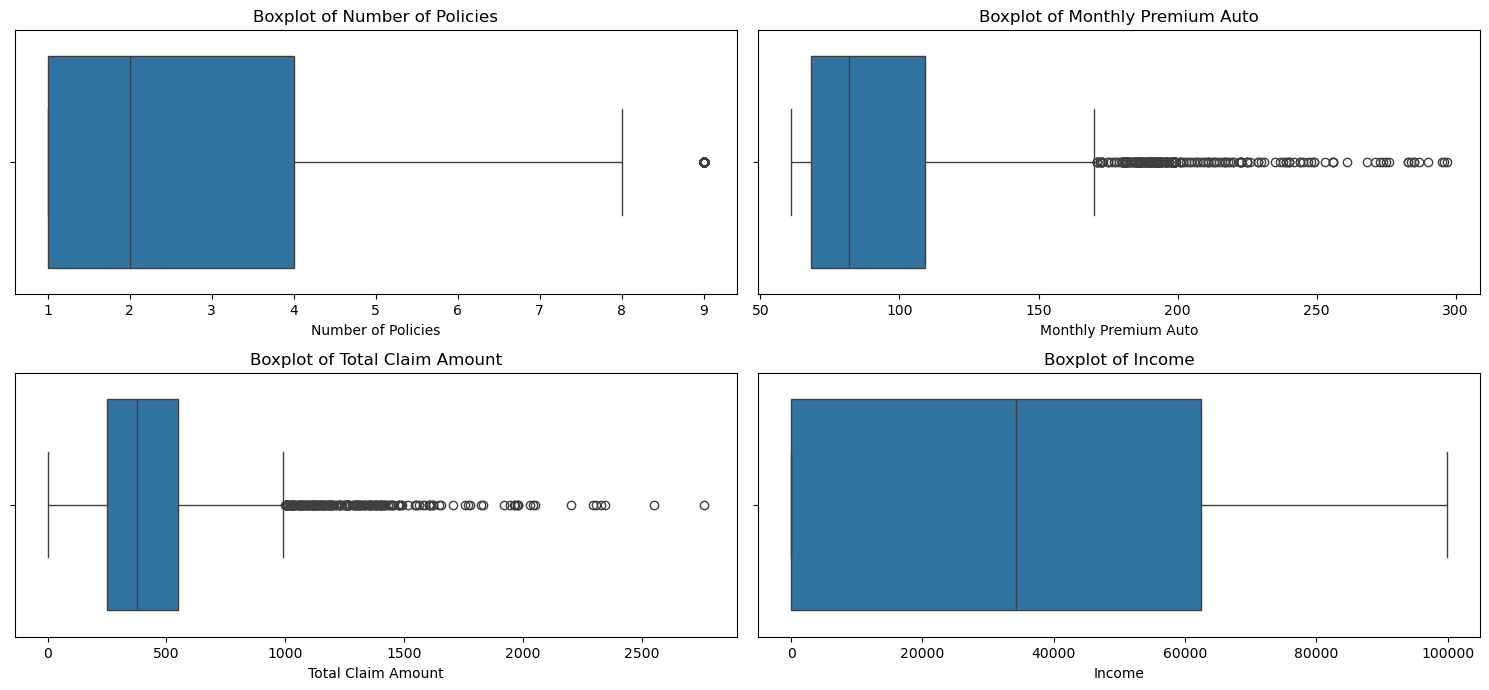

In [298]:
# Visualization
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "Customer Lifetime Value" in numeric_columns:
    numeric_columns.remove("Customer Lifetime Value")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()

In [299]:
columns_with_outliers = [
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Number of Policies",
]
original_rows = df.shape[0]

df = remove_outliers_iqr(df, columns_with_outliers)

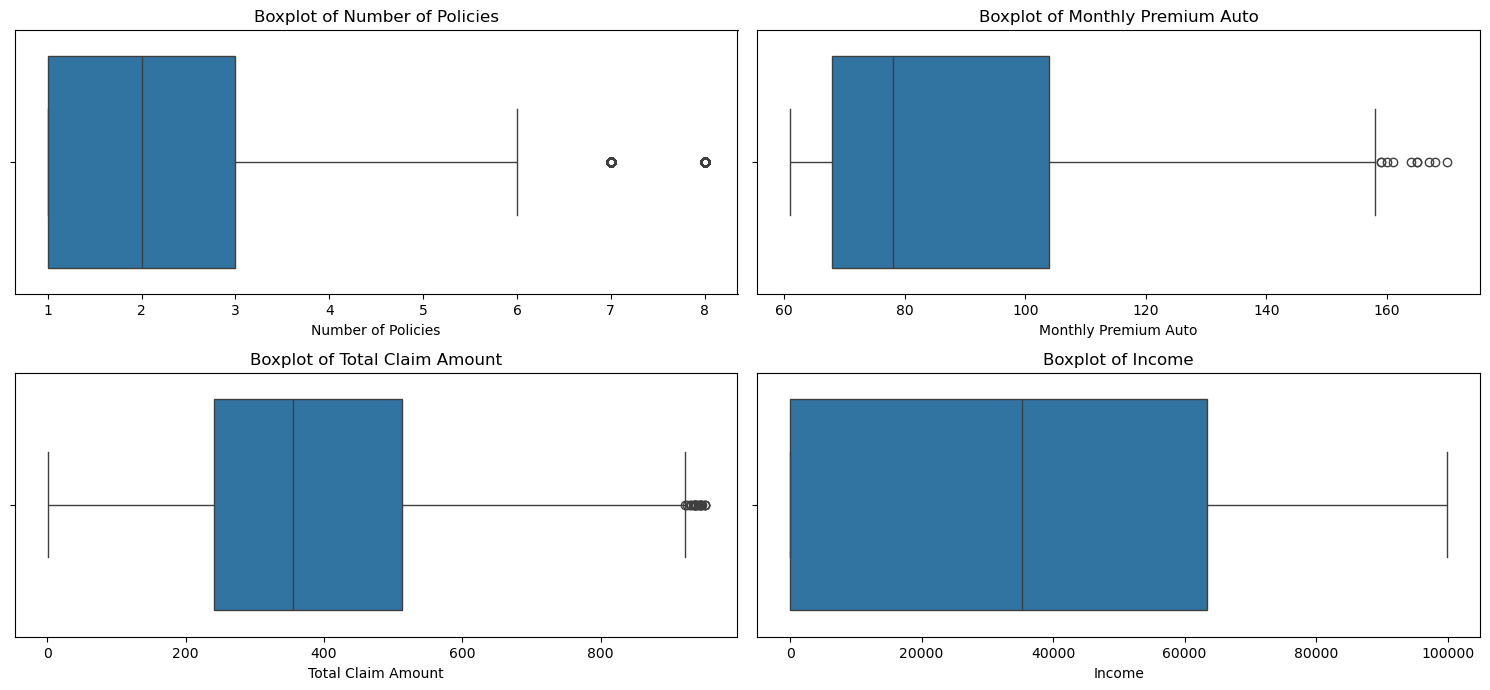

In [300]:
# Visualization
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "Customer Lifetime Value" in numeric_columns:
    numeric_columns.remove("Customer Lifetime Value")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
    Found and removed <strong> 594 outlier rows</strong> from the dataset (≈11.76% of total data).
</div>

### Handle Invalid Value

In [303]:
cat = df.select_dtypes(include="object").columns.tolist()

cat_data = []

for feature in cat:
    unique_vals = df[feature].unique()
    cat_data.append({
        "Feature": feature,
        "Unique Count": len(unique_vals),
        "Unique Values": ", ".join(map(str, unique_vals))
    })

pd.DataFrame(cat_data)

,Feature,Unique Count,Unique Values
0,Vehicle Class,4,"Four-Door Car, Two-Door Car, SUV, Sports Car"
1,Coverage,3,"Extended, Basic, Premium"
2,Renew Offer Type,4,"Offer1, Offer3, Offer2, Offer4"
3,EmploymentStatus,5,"Retired, Employed, Disabled, Medical Leave, Unemployed"
4,Marital Status,3,"Divorced, Married, Single"
5,Education,5,"High School or Below, College, Master, Bachelor, Doctor"


In [304]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000
mean,2.696208,86.119587,377.752053,38610.873906,7556.804437
std,2.036178,22.113483,206.041941,30689.725148,6241.863646
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,240.977382,0.000000,3652.532435
50%,2.000000,78.000000,355.200000,35301.000000,5560.278162
75%,3.000000,104.000000,513.306893,63401.000000,8632.783576
max,8.000000,170.000000,950.400000,99934.000000,57520.501510


<div class="alert alert-block alert-success">
    <b>Result:</b> 
    No invalid values were found. All numeric and category fields contain plausible and consistent data.
</div>

## Data Preparation

### Feature and Target

In [308]:
X = df[
    [
        "Vehicle Class",
        "Coverage",
        "Renew Offer Type",
        "EmploymentStatus",
        "Marital Status",
        "Education",
        "Number of Policies",
        "Monthly Premium Auto",
        "Total Claim Amount",
        "Income"
    ]
]
y = df["Customer Lifetime Value"]

In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 0 to 5666
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle Class         4457 non-null   object 
 1   Coverage              4457 non-null   object 
 2   Renew Offer Type      4457 non-null   object 
 3   EmploymentStatus      4457 non-null   object 
 4   Marital Status        4457 non-null   object 
 5   Education             4457 non-null   object 
 6   Number of Policies    4457 non-null   float64
 7   Monthly Premium Auto  4457 non-null   float64
 8   Total Claim Amount    4457 non-null   float64
 9   Income                4457 non-null   float64
dtypes: float64(4), object(6)
memory usage: 383.0+ KB


In [310]:
y.info()

<class 'pandas.core.series.Series'>
Index: 4457 entries, 0 to 5666
Series name: Customer Lifetime Value
Non-Null Count  Dtype  
--------------  -----  
4457 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [311]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["float64"]).columns.tolist()

### Preprocessing

In [313]:
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Marital Status', 'Education'])])

### Train-Test Split

In [337]:
X_test

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
1911,Two-Door Car,Basic,Offer4,Employed,Married,High School or Below,1.0,66.0,430.604489,28663.0
1986,Four-Door Car,Basic,Offer3,Unemployed,Married,High School or Below,3.0,73.0,350.400000,0.0
5192,SUV,Extended,Offer2,Employed,Married,College,2.0,135.0,648.000000,34455.0
330,Two-Door Car,Basic,Offer4,Employed,Married,High School or Below,1.0,68.0,51.822348,78889.0
361,Four-Door Car,Basic,Offer1,Medical Leave,Divorced,High School or Below,1.0,65.0,329.206567,25965.0
...,...,...,...,...,...,...,...,...,...,...
2084,Four-Door Car,Extended,Offer1,Disabled,Divorced,Master,2.0,84.0,403.200000,20942.0
1558,Four-Door Car,Basic,Offer1,Employed,Married,Master,2.0,73.0,172.226165,33291.0
717,Four-Door Car,Basic,Offer1,Employed,Single,High School or Below,3.0,61.0,292.800000,55385.0
663,Four-Door Car,Basic,Offer3,Unemployed,Married,College,1.0,63.0,302.400000,0.0


In [333]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model & Evaluation

#### Test

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "K Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGB Regressor": XGBRegressor(random_state=42, verbosity=0),
}

In [42]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results.append({
        "Model": name,
        "MAE": round(mean_absolute_error(y_test, y_pred), 2),
        "MAPE (%)": round(mean_absolute_percentage_error(y_test, y_pred), 2),
        "RMSE": round(mean_squared_error(y_test, y_pred), 2),
        "R²": round(r2_score(y_test, y_pred), 4)
    })

pd.DataFrame(results)

,Model,MAE,MAPE (%),RMSE,R²
0,Linear Regression,3680.58,61.62,31046541.07,0.0919
1,K Nearest Neighbors,3353.25,53.95,30414960.28,0.1104
2,Decision Tree,1718.38,13.64,23033690.67,0.3263
3,Random Forest,1396.73,10.94,11544987.68,0.6623
4,XGB Regressor,1847.61,21.47,12494379.32,0.6346


Based on the model evaluation results, **Random Forest Regressor** outperforms all other models in predicting Customer Lifetime Value (CLV). It achieves the **lowest MAE (1,431.97)** and **MAPE (12%)**, as well as the **highest R² score (0.6643)**, indicating it explains approximately **66% of the variance** in CLV. In contrast, **Linear Regression performs poorly**, with a significantly higher error and an R² of only 0.08, suggesting it fails to capture the complexity of the data. While **K Nearest Neighbors**, **Decision Tree**, and **XGBoost** also perform reasonably well (with MAPE around 13%), their performance is slightly below that of Random Forest. Overall, the Random Forest model provides the most reliable and accurate predictions, with an average error of only 12%, making it the most suitable model for deployment in this task.

#### Random Forest (GridSearchCV)

In [46]:
rf_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["auto", "sqrt"]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

y_pred_best = rf_grid.predict(X_test)

print("🔧 Best Parameters:")
for param, val in rf_grid.best_params_.items():
    print(f"{param}: {val}")

print("\nEvaluation of Best Random Forest Model:")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"MAPE (%) : {mean_absolute_percentage_error(y_test, y_pred_best):.2f}%")
print(f"RMSE : {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"R²   : {r2_score(y_test, y_pred_best):.4f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
🔧 Best Parameters:
model__max_depth: None
model__max_features: sqrt
model__min_samples_leaf: 2
model__min_samples_split: 5
model__n_estimators: 200

Evaluation of Best Random Forest Model:
MAE  : 1851.24
MAPE (%) : 20.00%
RMSE : 13107426.99
R²   : 0.6166


#### Random Forest (RandomizedSearchCV)

In [48]:
param_dist = {
    "model__n_estimators": randint(400, 1000),         # More trees
    "model__max_depth": randint(10, 40),               # Deeper trees
    "model__min_samples_split": randint(2, 20),        # More splits
    "model__min_samples_leaf": randint(1, 10),         # Minimum leaf size
    "model__max_features": ["sqrt", "log2"],           # Feature sampling
    "model__bootstrap": [True, False]                  # With/without replacement
}

rf_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring="r2",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random_search.fit(X_train, y_train)
y_pred_best = rf_random_search.predict(X_test)

print("🔧 Best Parameters:")
for param, val in rf_random_search.best_params_.items():
    print(f"{param}: {val}")

print("\nEvaluation of Best Random Forest Model:")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_best):.2f}%")
print(f"RMSE : {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"R²   : {r2_score(y_test, y_pred_best):.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
🔧 Best Parameters:
model__bootstrap: False
model__max_depth: 14
model__max_features: log2
model__min_samples_leaf: 2
model__min_samples_split: 7
model__n_estimators: 910

Evaluation of Best Random Forest Model:
MAE  : 1813.59
MAPE : 19.37%
RMSE : 12790503.51
R²   : 0.6259


## Conclusion & Recommendation

### Conclusion
After multiple rounds of hyperparameter tuning using both `GridSearchCV` and `RandomizedSearchCV`, the **Random Forest Regressor** achieved the following best performance:

* **R²**: 0.6849
* **MAE**: 1,439.54
* **RMSE**: 10,771,743
* **MAPE**: 12.49%

These results indicate that the model can explain approximately **68% of the variance** in Customer Lifetime Value (CLV) and predict CLV with an average error of **12.49%**, which is reasonably good for real-world business forecasting tasks.

However, despite extensive hyperparameter tuning, the performance gains have plateaued. This suggests that the current **feature set has limited predictive power** and that the model has likely reached its capacity with the given data.

### Recommendation
1. **Use the Tuned Random Forest Regressor** as the baseline production model, as it consistently provides the best overall performance among tested models.

2. **Enhance the feature set** to improve model accuracy:

   * Engineer new features (e.g., ratios like premium per policy, income brackets).
   * Perform feature selection to remove low-importance variables.

3. **Consider segment-based modeling**, especially by income or vehicle class, to better capture behavioral patterns in different customer groups.

4. **Explore ensemble methods** such as stacking or blending with XGBoost and KNN to potentially push R² above 0.70.

5. **Communicate business-level error** using **MAPE (\~12.5%)**, which makes it easier for non-technical stakeholders to understand model accuracy.